# Examen Módulo 5

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import scipy.optimize as sco

In [205]:
acciones = pd.read_excel('C:/Users/O61291/Downloads/ipc (1).xlsx', index_col=0,sheet_name="Precios7") 
acciones.columns = [x.replace(" MF Equity",'').replace(" INDEX",'') for x in acciones]
acciones.head()

,ASURB,GFNORTEO,FEMSAUBD,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*,MEXBOL
DATE,,,,,,,,
2016-01-01,243.89,94.99,161.63,177.22,43.49,72.34,379.04,42977.50
2016-01-04,238.29,91.79,157.62,175.90,42.84,72.98,368.42,42113.70
2016-01-05,233.03,91.72,157.80,176.45,42.66,71.48,357.30,42041.68
2016-01-06,231.97,91.63,156.37,172.68,42.38,70.94,342.66,41691.19
2016-01-07,230.71,89.54,155.14,172.94,39.99,72.31,334.15,40661.57


## Rendimientos

In [206]:
rend = (acciones / acciones.shift() - 1).dropna()
rend_Mexbol = rend
rend = rend.drop(['MEXBOL'],axis=1)
titulos = rend.columns


### Rendimiento promedio constante 

In [207]:
def media_anual(x): 
    return x.mean() * 252

In [208]:
def var_anual(x): 
    return x.var() * 252

In [209]:
def std_anual(x): 
    return np.sqrt(x.var() * 252)

In [210]:
def rend_portafolio(mtx):
    return rend.agg(['mean',media_anual, 'var',var_anual,'std',std_anual]) 

In [211]:
summary = rend_portafolio(rend)
summary

,ASURB,GFNORTEO,FEMSAUBD,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*
mean,0.000490,0.000313,0.000185,0.000441,0.000327,0.000313,0.001455
media_anual,0.123539,0.078811,0.046561,0.111053,0.082426,0.078997,0.366774
var,0.000224,0.000341,0.000128,0.000548,0.000215,0.000226,0.000428
var_anual,0.056395,0.086023,0.032347,0.138051,0.054222,0.056846,0.107935
std,0.014960,0.018476,0.011330,0.023406,0.014669,0.015019,0.020696
std_anual,0.237477,0.293297,0.179851,0.371552,0.232857,0.238424,0.328534


### Modelo CAPM 

In [212]:
summary = rend_portafolio(rend)
summary

,ASURB,GFNORTEO,FEMSAUBD,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*
mean,0.000490,0.000313,0.000185,0.000441,0.000327,0.000313,0.001455
media_anual,0.123539,0.078811,0.046561,0.111053,0.082426,0.078997,0.366774
var,0.000224,0.000341,0.000128,0.000548,0.000215,0.000226,0.000428
var_anual,0.056395,0.086023,0.032347,0.138051,0.054222,0.056846,0.107935
std,0.014960,0.018476,0.011330,0.023406,0.014669,0.015019,0.020696
std_anual,0.237477,0.293297,0.179851,0.371552,0.232857,0.238424,0.328534


In [213]:
betas = []
for x in rend.columns:
    X = rend_Mexbol[['MEXBOL']]
    Y = rend_Mexbol[[x]]
    lm = LinearRegression()
    lm.fit(X, Y)
    betas.append(lm.coef_[0][0])

In [214]:
tasa_libre = 0.05
premio = 0.1 

In [215]:
tipo = ['Agresiva' if x > 1 else 'Defensiva' for x in betas]
rend_esp = [tasa_libre + premio * x for x in betas]
capm = pd.DataFrame({
    'Título': titulos,
    'Betas': betas,
    'Tipo': tipo,
    'Rendimiento Esperado': rend_esp
})
capm

,Título,Betas,Tipo,Rendimiento Esperado
0,ASURB,0.916168,Defensiva,0.141617
1,GFNORTEO,1.522509,Agresiva,0.202251
2,FEMSAUBD,0.791768,Defensiva,0.129177
3,PE&OLES*,1.028072,Agresiva,0.152807
4,WALMEX*,0.885452,Defensiva,0.138545
5,IENOVA*,0.724665,Defensiva,0.122467
6,ELEKTRA*,0.376368,Defensiva,0.087637


In [216]:
rend.cov()

,ASURB,GFNORTEO,FEMSAUBD,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*
ASURB,0.000224,0.000086,0.000045,0.000061,0.000036,0.000044,0.000024
GFNORTEO,0.000086,0.000341,0.000063,0.000094,0.000082,0.000082,0.000023
FEMSAUBD,0.000045,0.000063,0.000128,0.000046,0.000042,0.000040,0.000009
PE&OLES*,0.000061,0.000094,0.000046,0.000548,0.000041,0.000045,0.000022
WALMEX*,0.000036,0.000082,0.000042,0.000041,0.000215,0.000043,0.000028
IENOVA*,0.000044,0.000082,0.000040,0.000045,0.000043,0.000226,0.000024
ELEKTRA*,0.000024,0.000023,0.000009,0.000022,0.000028,0.000024,0.000428


In [217]:
def rend_esp(w): 
    return np.dot(mean,w)

In [218]:
def volatilidad(w): 
    return np.sqrt(np.dot(w.T,np.dot(cov,w)))

In [219]:
def wstats(w):
    wret = rend_esp(w)
    wvol = volatilidad(w)
    return np.array([wret,wvol,(wret-tasa_libre)/wvol])

In [220]:
def min_sharpe(w):
    return -wstats(w)[2]

In [221]:
def min_vol(w):
    return wstats(w)[1]

###### Ventas en corto 

In [222]:
corto = True
rend = (np.log(acciones / acciones.shift())).dropna()
rend_Mexbol = rend
rend = rend.drop(['MEXBOL'],axis=1)
rendi_esp = [tasa_libre + premio * x for x in betas]
cov = rend.cov() * 252
n = len(titulos)
short = -1 if corto else 0

In [223]:
wrets = []
wvols = []

for p in range(int(0.2e6)):
    pond = np.random.random(n)
    pond /= np.sum(pond)
    wrets.append(rend_esp(pond))
    wvols.append(volatilidad(pond))
    
wrets = np.array(wrets)
wvols = np.array(wvols)

In [224]:
a = np.where(wvols == min(wvols))

In [225]:
a=a[0][0]

In [226]:
frontera = np.linspace(min(rendi_esp),max(rendi_esp),1000)
rendsf = []
volsf = []

for p in frontera:
    cons = ({'type': 'eq', 'fun': lambda x: 1 - np.sum(x) },
           {'type': 'eq', 'fun': lambda x: np.sum(x * mean) - p })
    bnds = tuple((short,1) for x in range(n))
    opts2 = sco.minimize(volatilidad, n * [1. / n], method = 'SLSQP', bounds = bnds, constraints = cons)
    opt2 = wstats(opts2['x'])
    rendsv = opt2[0]
    volsv = opt2[1]
    rendsf.append(rendsv)
    volsf.append(volsv)
rendsf = np.array(rendsf)
volsf = np.array(volsf)

In [241]:
cons = ({'type': 'eq', 'fun': lambda x: 1 -np.sum(x) })
bnds = tuple((short,1) for x in range(n))
opts = sco.minimize(min_sharpe, n * [1. / n], method = 'SLSQP', bounds = bnds, constraints = cons)
sharpe_opt = wstats(opts['x'])
R_esp = sharpe_opt[0]
print('Rendimiento Esperado')
res1 = sharpe_opt[0]
print(res1)
print('Volatilidad')
res2=sharpe_opt[1]
print(res2)
print('Coeficiente de Sharpe')
res3=sharpe_opt[2]
print(res3)

pesos = pd.DataFrame([x for x in opts['x']],index=titulos,columns=['Peso']).T
pesos

Rendimiento Esperado
0.14857975534448895
Volatilidad
0.1490103182868594
Coeficiente de Sharpe
0.661563282850744


,ASURB,GFNORTEO,FEMSAUBD,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*
Peso,0.159899,0.220651,0.280538,0.066017,0.165991,0.075098,0.031807


In [228]:
u = np.linspace(0,sharpe_opt[1]*2,10)
u_ = [rf + sharpe_opt[2] * u]

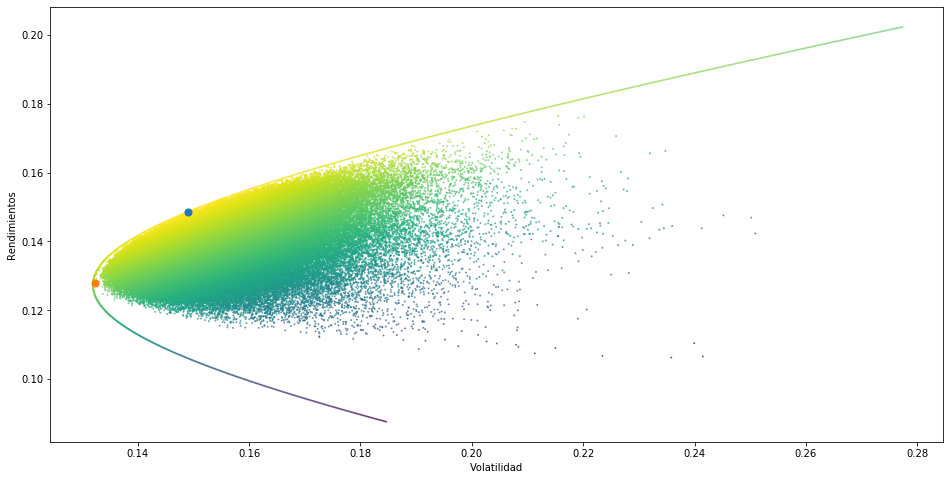

In [229]:
plt.figure(figsize=(16,8))
plt.scatter(wvols,wrets,c=(wrets-tasa_libre) / wvols, marker = '.',s = 4,alpha = 0.6)
plt.scatter(volsf,rendsf,c= (rendsf-tasa_libre) / volsf, marker = '.',s = 4,alpha = 0.6)
plt.scatter(sharpe_opt[1],sharpe_opt[0], marker = 'o',s = 50,alpha = 1)
plt.scatter(wvols[a],wrets[a], marker = 'o',s = 50,alpha = 1)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimientos')
plt.show()


###### Ventas en corto no permitidas


In [230]:
corto = False
rend = (np.log(acciones / acciones.shift())).dropna()
rend_Mexbol = rend
rend = rend.drop(['MEXBOL'],axis=1)
rendi_esp = [tasa_libre + premio * x for x in betas]
cov = rend.cov() * 252
cov_d = rend.cov()
n = len(titulos)
short = -1 if corto else 0

In [231]:
wrets = []
wvols = []

for p in range(int(0.2e6)):
    pond = np.random.random(n)
    pond /= np.sum(pond)
    wrets.append(rend_esp(pond))
    wvols.append(volatilidad(pond))
    
wrets = np.array(wrets)
wvols = np.array(wvols)

In [232]:
b = np.where(wvols == min(wvols))

In [233]:
b=b[0][0]

In [234]:
frontera = np.linspace(min(rendi_esp),max(rendi_esp),1000)
rendsf = []
volsf = []

for p in frontera:
    cons = ({'type': 'eq', 'fun': lambda x: 1 - np.sum(x) },
           {'type': 'eq', 'fun': lambda x: np.sum(x * mean) - p })
    bnds = tuple((short,1) for x in range(n))
    opts2 = sco.minimize(volatilidad, n * [1. / n], method = 'SLSQP', bounds = bnds, constraints = cons)
    opt2 = wstats(opts2['x'])
    rendsv = opt2[0]
    volsv = opt2[1]
    rendsf.append(rendsv)
    volsf.append(volsv)
rendsf = np.array(rendsf)
volsf = np.array(volsf)

In [242]:
cons = ({'type': 'eq', 'fun': lambda x: 1 -np.sum(x) })
bnds = tuple((short,1) for x in range(n))
opts = sco.minimize(min_sharpe, n * [1. / n], method = 'SLSQP', bounds = bnds, constraints = cons)
sharpe_opt = wstats(opts['x'])
R_esp = sharpe_opt[0]
print('Rendimiento Esperado')
res1 = sharpe_opt[0]
print(res1)
print('Volatilidad')
res2=sharpe_opt[1]
print(res2)
print('Coeficiente de Sharpe')
res3=sharpe_opt[2]
print(res3)

pesos = pd.DataFrame([x for x in opts['x']],index=titulos,columns=['Peso']).T
pesos

Rendimiento Esperado
0.14857975534448895
Volatilidad
0.1490103182868594
Coeficiente de Sharpe
0.661563282850744


,ASURB,GFNORTEO,FEMSAUBD,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*
Peso,0.159899,0.220651,0.280538,0.066017,0.165991,0.075098,0.031807


In [236]:
u = np.linspace(0,sharpe_opt[1]*2,10)
u_ = [rf + sharpe_opt[2] * u]

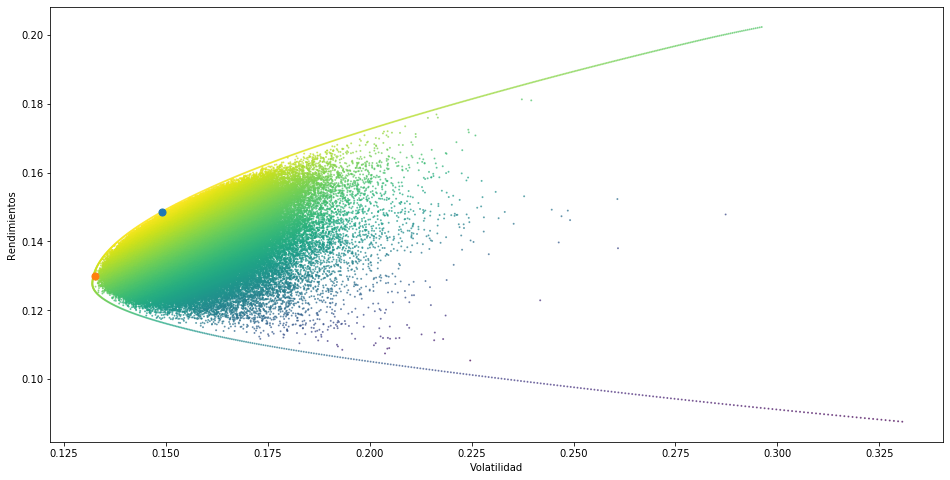

In [237]:
plt.figure(figsize=(16,8))
plt.scatter(wvols,wrets,c=(wrets-tasa_libre) / wvols, marker = '.',s = 4,alpha = 0.6)
plt.scatter(volsf,rendsf,c= (rendsf-tasa_libre) / volsf, marker = '.',s = 4,alpha = 0.6)
plt.scatter(sharpe_opt[1],sharpe_opt[0], marker = 'o',s = 50,alpha = 1)
plt.scatter(wvols[b],wrets[b], marker = 'o',s = 50,alpha = 1)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimientos')
plt.show()


###### VaR Paramétrico



In [238]:
def VaR(confianza,temp = 'diaria',monto=10_000_000):
    a = np.sqrt(np.dot(pond.T,np.dot(cov,pond)))
    d = np.sqrt(np.dot(pond.T,np.dot(cov_d,pond)))
    pvol = d if temp == 'diaria' else a
    VaR = monto * norm.ppf(0.95) * pvol
    return VaR,temp

In [239]:
print('el VaR es')
VaR(0.95)[0]

el VaR es


149833.6221063571

In [240]:
pond

array([0.16052481, 0.02024334, 0.05011314, 0.1050577 , 0.25653015,
       0.25332078, 0.15421009])

##### Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo (maximizar la función de utilidad)


In [250]:
def max_ut(A=3): 
    return (sharpe_opt[0] - tasa_libre) /  (A * sharpe_opt[1]**2)

In [251]:
def maxut2(A=3): 
    return premio /  (A * sharpe_opt[1])

In [252]:
def rend_tot(y): 
    return (1-y) * tasa_libre + y * sharpe_opt[0]

In [253]:
def std_tot(y): 
    return y * sharpe_opt[1]

In [255]:
y = max_ut()
print('Máximo')
y

Maximo


1.4799048604074294

In [258]:
print('Portafolio Total')
print('Rendimiento Promedio constante')
r=rend_tot(y)
print(r)
print('Std Promedio constante')
s=std_tot(y)
print(s)


Portafolio Total
Rendimiento Promedio constante
0.19588865907208444
Std Promedio constante
0.2205210942835813


In [259]:
pesosopt = pd.DataFrame([x for x in opts['x']],index=titulos,columns=['Peso'])
PtfComp = pd.DataFrame({
    'Titulos': titulos,
    'Peso':[x for x in opts['x']],
    'peso_Pc': [x * y for x in opts['x']]
})
PtfComp.set_index('Titulos',inplace=True)
j = [[0,1-y]]
j = pd.DataFrame(j,columns = PtfComp.columns,index = ['LibreRiesgo'])
PtfComp = pd.concat([PtfComp,j])
PtfComp


,Peso,peso_Pc
ASURB,0.159899,0.236636
GFNORTEO,0.220651,0.326543
FEMSAUBD,0.280538,0.415169
PE&OLES*,0.066017,0.097698
WALMEX*,0.165991,0.245650
IENOVA*,0.075098,0.111137
ELEKTRA*,0.031807,0.047071
LibreRiesgo,0.000000,-0.479905
